In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3f9e86900d646faa789872473ed38892


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | umm kaddadah
Processing Record 4 of Set 1 | dikson
Processing Record 5 of Set 1 | cottonwood heights
Processing Record 6 of Set 1 | bubaque
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | yar-sale
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | margate
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | salalah
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | utiroa
City not found. Skipping...
Processing Record 17 of Set 1 | toumodi
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | lebu
Proces

Processing Record 37 of Set 4 | iqaluit
Processing Record 38 of Set 4 | atar
Processing Record 39 of Set 4 | atambua
Processing Record 40 of Set 4 | maniitsoq
Processing Record 41 of Set 4 | genhe
Processing Record 42 of Set 4 | thompson
Processing Record 43 of Set 4 | breves
Processing Record 44 of Set 4 | sibolga
Processing Record 45 of Set 4 | aksarka
Processing Record 46 of Set 4 | tromso
Processing Record 47 of Set 4 | nanortalik
Processing Record 48 of Set 4 | gabu
Processing Record 49 of Set 4 | gambissara
Processing Record 50 of Set 4 | mayo
Processing Record 1 of Set 5 | guerrero negro
Processing Record 2 of Set 5 | bambous virieux
Processing Record 3 of Set 5 | portland
Processing Record 4 of Set 5 | galway
Processing Record 5 of Set 5 | miguel calmon
Processing Record 6 of Set 5 | verkhnevilyuysk
Processing Record 7 of Set 5 | zhanakorgan
Processing Record 8 of Set 5 | tilichiki
Processing Record 9 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 10 of Se

Processing Record 24 of Set 8 | xining
Processing Record 25 of Set 8 | shihezi
Processing Record 26 of Set 8 | vardo
Processing Record 27 of Set 8 | elko
Processing Record 28 of Set 8 | nishihara
Processing Record 29 of Set 8 | alakurtti
Processing Record 30 of Set 8 | bathsheba
Processing Record 31 of Set 8 | shenjiamen
Processing Record 32 of Set 8 | danilov
Processing Record 33 of Set 8 | chapais
Processing Record 34 of Set 8 | cruz alta
Processing Record 35 of Set 8 | san pablo
Processing Record 36 of Set 8 | oktyabrskiy
Processing Record 37 of Set 8 | dum duma
Processing Record 38 of Set 8 | ribeira grande
Processing Record 39 of Set 8 | hambantota
Processing Record 40 of Set 8 | mount gambier
Processing Record 41 of Set 8 | kruisfontein
Processing Record 42 of Set 8 | xunchang
Processing Record 43 of Set 8 | ipixuna
Processing Record 44 of Set 8 | katobu
Processing Record 45 of Set 8 | matay
Processing Record 46 of Set 8 | balimo
City not found. Skipping...
Processing Record 47 o

Processing Record 6 of Set 12 | kota kinabalu
Processing Record 7 of Set 12 | varkaus
Processing Record 8 of Set 12 | chapulhuacan
Processing Record 9 of Set 12 | vao
Processing Record 10 of Set 12 | marmarion
Processing Record 11 of Set 12 | san cristobal
Processing Record 12 of Set 12 | centralina
Processing Record 13 of Set 12 | marsh harbour
Processing Record 14 of Set 12 | tiznit
Processing Record 15 of Set 12 | beyneu
Processing Record 16 of Set 12 | bilibino
Processing Record 17 of Set 12 | ozgon
City not found. Skipping...
Processing Record 18 of Set 12 | urucara
Processing Record 19 of Set 12 | karratha
Processing Record 20 of Set 12 | benicarlo
Processing Record 21 of Set 12 | red wing
Processing Record 22 of Set 12 | betsiamites
Processing Record 23 of Set 12 | yeppoon
Processing Record 24 of Set 12 | palauig
Processing Record 25 of Set 12 | talnakh
Processing Record 26 of Set 12 | kiama
Processing Record 27 of Set 12 | lolua
City not found. Skipping...
Processing Record 28 

In [11]:
len(city_data)

537

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,80.58,80,20,1.01,US,2021-05-28 05:30:30
1,Victoria,22.2855,114.1577,93.25,81,100,8.01,HK,2021-05-28 05:19:07
2,Umm Kaddadah,13.6017,26.6876,83.77,12,34,3.13,SD,2021-05-28 05:22:37
3,Dikson,73.5069,80.5464,29.12,86,43,7.99,RU,2021-05-28 05:30:31
4,Cottonwood Heights,40.6197,-111.8102,64.06,36,1,7.00,US,2021-05-28 05:26:37
5,Bubaque,11.2833,-15.8333,77.34,78,15,9.69,GW,2021-05-28 05:30:31
6,Albany,42.6001,-73.9662,51.75,64,79,3.87,US,2021-05-28 05:28:31
7,Yar-Sale,66.8333,70.8333,41.59,41,78,9.60,RU,2021-05-28 05:30:32
8,Busselton,-33.6500,115.3333,73.09,76,35,14.76,AU,2021-05-28 05:30:32
9,Margate,51.3813,1.3862,52.03,79,100,1.99,GB,2021-05-28 05:30:26


In [13]:
new_column_order=['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2021-05-28 05:30:30,22.0752,-159.3190,80.58,80,20,1.01
1,Victoria,HK,2021-05-28 05:19:07,22.2855,114.1577,93.25,81,100,8.01
2,Umm Kaddadah,SD,2021-05-28 05:22:37,13.6017,26.6876,83.77,12,34,3.13
3,Dikson,RU,2021-05-28 05:30:31,73.5069,80.5464,29.12,86,43,7.99
4,Cottonwood Heights,US,2021-05-28 05:26:37,40.6197,-111.8102,64.06,36,1,7.00
5,Bubaque,GW,2021-05-28 05:30:31,11.2833,-15.8333,77.34,78,15,9.69
6,Albany,US,2021-05-28 05:28:31,42.6001,-73.9662,51.75,64,79,3.87
7,Yar-Sale,RU,2021-05-28 05:30:32,66.8333,70.8333,41.59,41,78,9.60
8,Busselton,AU,2021-05-28 05:30:32,-33.6500,115.3333,73.09,76,35,14.76
9,Margate,GB,2021-05-28 05:30:26,51.3813,1.3862,52.03,79,100,1.99


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

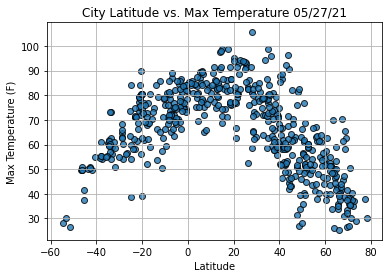

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

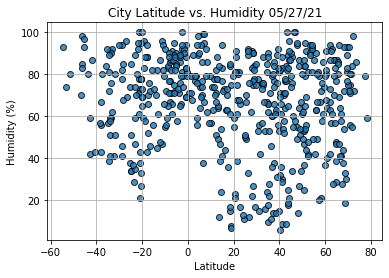

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()